<a href="https://colab.research.google.com/github/so-dipe/Internships/blob/main/TSA%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 13.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
! pip show statsmodels

Name: statsmodels
Version: 0.13.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: packaging, patsy, numpy, pandas, scipy
Required-by: plotnine


In [3]:
#import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error

In [4]:
#get kaggle API token
url = 'https://raw.githubusercontent.com/so-dipe/so-dipe/main/kaggle.json'
r = requests.get(url, allow_redirects=True)
open('kaggle.json', 'wb').write(r.content)


66

In [5]:
#get dataset from kaggle with API
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d jameslko/gun-violence-data

 51% 17.0M/33.6M [00:00<00:00, 25.2MB/s]
100% 33.6M/33.6M [00:00<00:00, 41.8MB/s]


In [6]:
#unzip dataset
! unzip gun-violence-data.zip

Archive:  gun-violence-data.zip
  inflating: gun-violence-data_01-2013_03-2018.csv  


In [7]:
#import data
df = pd.read_csv('/content/gun-violence-data_01-2013_03-2018.csv')
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


The dataset has a lot of columns, so we quickly check the overview of everything.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

As we can see here, this data contains a lot of columns and most won't be useful for the Time Series Model.
At first glance, only `date`, `n_killed` and `n_injured` seem useful for the Time Series.

To make a time series prediction, we would generally need a column has datatype `int` or `float`. 

We might also keep the `n_guns_involved`, but note that we can only use one of these columns as most (not all) Time Series models do not use multiple features

In [9]:
df = df[['date', 'n_killed', 'n_injured', 'n_guns_involved']].fillna(0)
df.head()

,date,n_killed,n_injured,n_guns_involved
0,2013-01-01,0,4,0.0
1,2013-01-01,1,3,0.0
2,2013-01-01,1,3,2.0
3,2013-01-05,4,0,0.0
4,2013-01-07,2,2,2.0


The dataset looks less complex now. But we need to do a little cleaning.

The date column has dtype `object` but we need it in form of `datetime` object and also as the index of the dataframe

We can do this easily using pandas `to_datetime` function.

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
#set index to date
df.set_index('date', inplace=True)

In [12]:
df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-01,0,4,0.0
2013-01-01,1,3,0.0
2013-01-01,1,3,2.0
2013-01-05,4,0,0.0
2013-01-07,2,2,2.0


Now that we have set the index to the particular date, we still have to aggregate.

From what we can see above and probably common knowledge, crime (gun violence) takes place more than once in a day and this lead to multiple entries (examples)in the dataframe having the same date (index).

This can be done in different ways... 🤔

In [13]:
daily_df = df.resample('1D').sum().fillna(method='ffill')

In [14]:
daily_df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-01,2,10,2.0
2013-01-02,0,0,0.0
2013-01-03,0,0,0.0
2013-01-04,0,0,0.0
2013-01-05,4,0,0.0



That worked... 😀

Now, lets create a quick line plot to see how things are... 😩

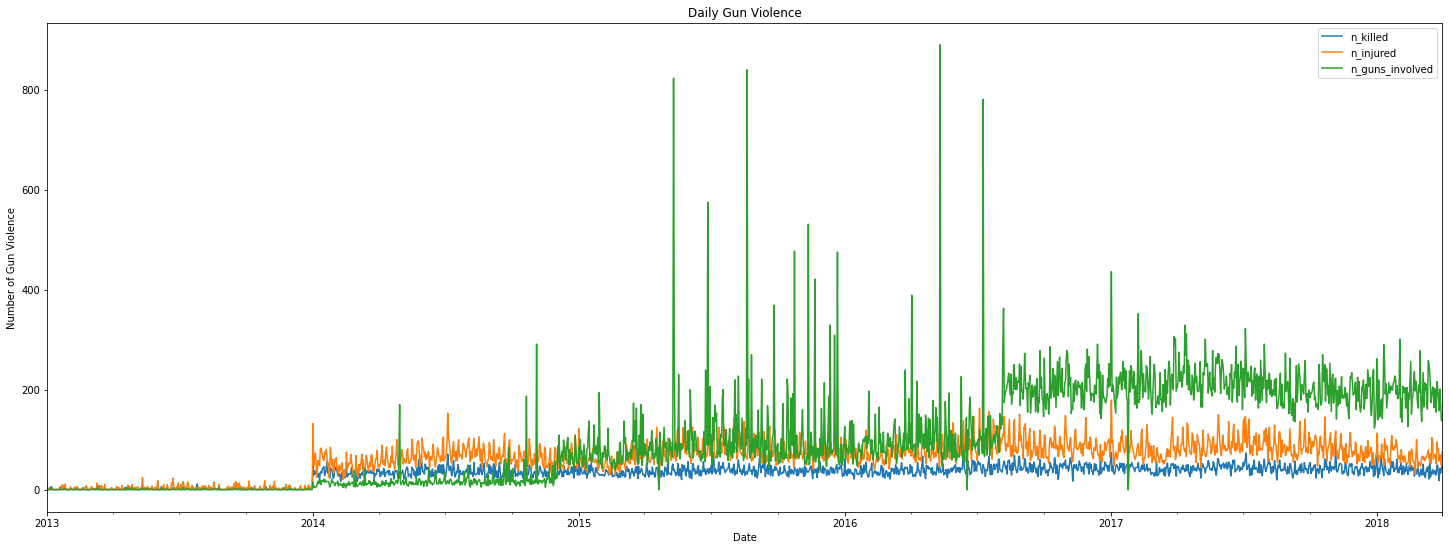

In [15]:
fig, ax = plt.subplots(figsize=(25, 9)) #Freat not, this command here just sets the size of the figure
daily_df.plot(kind='line', ax=ax) #The actual plotting function (note ax=ax, that tells python where to plot)
plt.title('Daily Gun Violence')
plt.ylabel('Number of Gun Violence')
plt.xlabel('Date');

*Yh, I know... I can never find the right title for my plots* 😩

The plot looks messy and I was thinking, since the data is from `2013` to `2018`, we could aggreate over a much larger time period like a week or month.

To do that, we revisit a previous cell... 🚶

In [16]:
weekly_df = df.resample('1W').sum().fillna(method='ffill')
weekly_df.head()

,n_killed,n_injured,n_guns_involved
date,,,
2013-01-06,6,10,2.0
2013-01-13,6,2,2.0
2013-01-20,5,0,2.0
2013-01-27,6,32,4.0
2013-02-03,1,8,2.0


Now, we have the data over a weekly period, though I have to admit I wasn't expecting the index to look like this... 

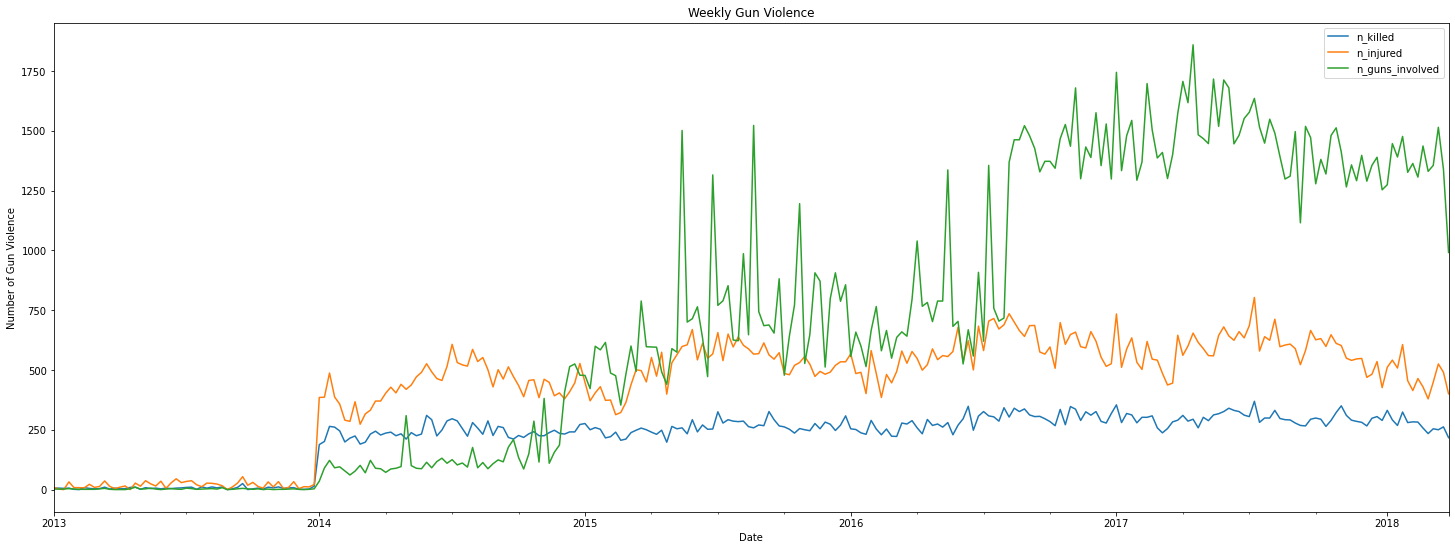

In [17]:
# Ploting weekly_df
fig, ax = plt.subplots(figsize=(25, 9)) #Freat not, this command here just sets the size of the figure
weekly_df.plot(kind='line', ax=ax) #The actual plotting function (note ax=ax, that tells python where to plot)
plt.title('Weekly Gun Violence')
plt.ylabel('Number of Gun Violence')
plt.xlabel('Date');

Wow, a lot better...

But now I worry I do not have enough data to make a really nice Time Series Prediction Model... (*overthinking...*)

So lets see how much that we have...

In [18]:
weekly_df.shape

(274, 3)

Wow, only 273 rows (examples). That's not a lot and might not be good for the Time Series (usually ML models require a lot of data).

I would still carry on using the weekly data `weekly_df` for Time Series Analysis, but might have to go back to the daily data `daily_df`

In [19]:
daily_df.shape

(1916, 3)

`daily_df` has way more data (not a lot) but probably good enough for creating small prediction models.

## Time Series Analysis (TSA)

Ok, I have to do the time series of each feature on after the other. 

I'll be starting with the `n_injured` column. I think the `n_injured` column is just a sum of those that were injured due to the crime and those that were killed `n_killed` (I'd have to check how right this is. But I just want to say it makes sense to start here since predicting this number can help with finding solutions to gun violence. But I'm not an expert in stuffs like this so I'd shut up now. 🤐

In [20]:
(daily_df['n_injured'] <= daily_df['n_killed']).sum()

248

Ok, from the above, my little hypothesis was wrong. 

I just checked if those that were injured were at anytime less than those that were killed and I got a result of `57`. This means that on `57` days  there were more dead victims than injured.

And it also means that 
```
n_injured ~= n_injured + n_killed
```

But we still continue our analysis on this column

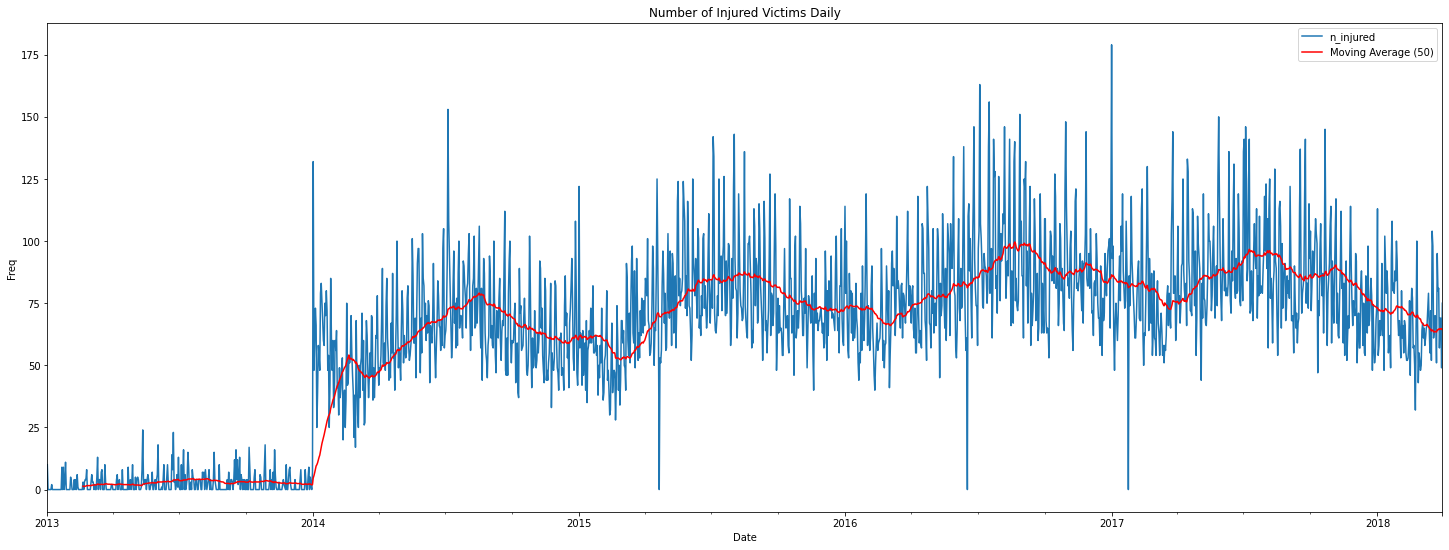

In [21]:
fig, ax = plt.subplots(figsize=(25, 9))
daily_df['n_injured'].plot(kind='line', ax=ax, label='n_injured')
daily_df['n_injured'].rolling(50).mean().plot(kind='line', ax=ax, color='red', label='Moving Average (50)')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Freq')
plt.title('Number of Injured Victims Daily');

From the Rolling Average (Moving Average), you can notice a little bit of seasonality. There are always peaks mid year and decline towards the end of the year.

We can also notice a but of trend (additive) in from this plot.

In [22]:
# inx = pd.date_range(daily_df.index[0], daily_df.index[-1])
# X = daily_df.reindex(inx, fill_value=0)
n_injured_decomp = seasonal_decompose(daily_df['n_injured'], model='additive', period=365)

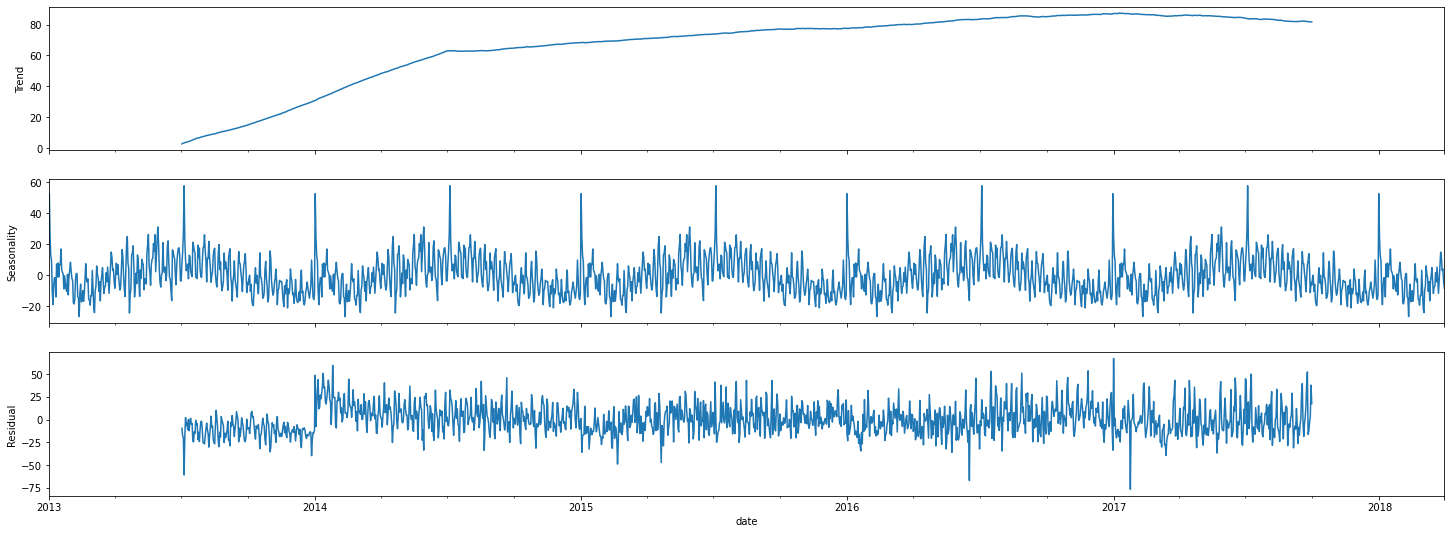

In [73]:
fig, ax = plt.subplots(figsize=(25, 9), nrows=3, ncols=1)
n_injured_decomp.trend.plot(ax=ax[0], ylabel='Trend', sharex=True)
n_injured_decomp.seasonal.plot(ax=ax[1], ylabel='Seasonality')
n_injured_decomp.resid.plot(ax=ax[2], ylabel='Residual');

From this decomposition, taking a frequency/period of 365 days (1 year), we can see that there is not much trend in the data, but we can see a little seasonality. 

Next, we test for stationarity using the Augumented Dickey Fuller Test (ADF Test)

For the ADF test, we create two hypothesis...

Null Hypothesis(Hₒ) - The time series is not stationary and has some time dependent structure
Alternate Hypothesis(Hₒ) - The time series is stationary and does not have unit root.

Ok, so I realise I have to slow down a bit. This test (ADF) is used to see if there is a change in the mean and variance of the time series with time (time-dependent). This is supposedly importannt because it's easier to predict a stationary time series - our model (ARMA) depends on it.

This does not mean that even if the time series is stationary, we wouldn't continue with our modelling. Also note that the ADF test is not the only way to test for Stationarity and you should consider using descriptive statistics first. 😩😪

In [24]:
adf = adfuller(daily_df['n_injured'])
print('Test Statistic: ', adf[0])
print('p-value: ', adf[1])
print('Critical Values: ')
for key, value in adf[4].items():
  print('\t%s: %.3f' % (key, value))

Test Statistic:  -2.1084231631897516
p-value:  0.24114112239250785
Critical Values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


Now, to interpret this statistics, we say that we reject the null hypothesis on the grounds that the `p-value` is less than a certain α (usually α=0.5). But it always a good sign when the `p-value` is as close to zero as possible.

So from the above results, we reject the null hypothesis (Hₒ) and conclude that the time series is stationary.

🤯🤯🤯

Without wasting time (with further ado), let's move on to Autocorrelation and Partial Autocorrelation.

This is what helps determine the `p` and `q` value of our `ARMA` model

In [25]:
y = daily_df['n_injured']

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


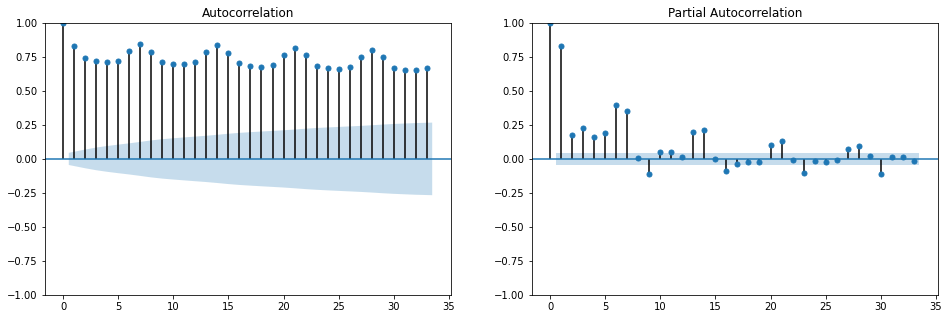

In [26]:
fig, ax = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
plot_acf(y, ax[0])
plot_pacf(y, ax=ax[1]);

Well, this PACF tells gives a compelling case of what `p` should be, but we still have to find `q` and the ACF plot is well above the significance line. We could extend the plot to show more lags but...

Let's just do that....

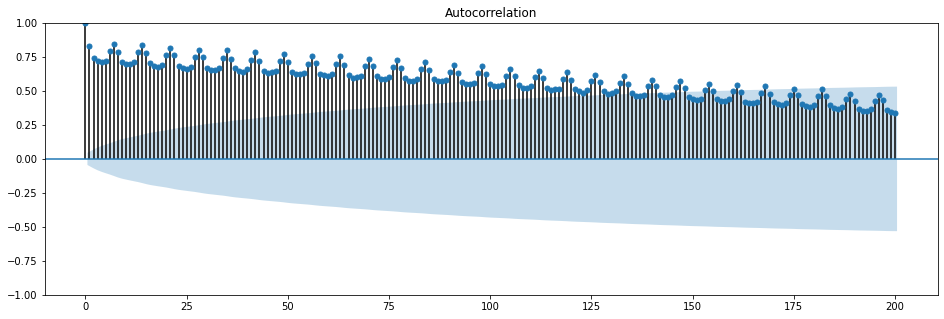

In [27]:
fig, ax = plt.subplots(figsize=(16, 5))
plot_acf(y, ax=ax, lags=200);

In [28]:
#Train-Test Split
y_train = y[:1900]
y_test = y[1900:]
print(f'shape of y_train is {y_train.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of y_train is (1900,)
shape of y_test is (16,)


In [29]:
# Building the model 🥱 😴
model = ARIMA(y_train, order=(7, 0, 6)).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              n_injured   No. Observations:                 1900
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -7730.786
Date:                Fri, 19 Aug 2022   AIC                          15491.573
Time:                        14:19:07   BIC                          15574.817
Sample:                    01-01-2013   HQIC                         15522.218
                         - 03-15-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.7084   1478.833      0.042      0.967   -2836.750    2960.167
ar.L1          0.8790      0.124      7.068      0.000       0.635       1.123
ar.L2         -0.5038      0.221     -2.283      0.0

In [30]:
mean_absolute_error(y_train, len(y_train) * [y_train.mean()])

27.285180055401664

Ok, what did I just do right...

Well, I forgot to set a baseline initially, so I decided to do it here.

The model baseline is what informs my decision on how well the model is performing. Here I am using the `mean_absolute_error` (MAE) metric and to calculate the baseline, I've just assummed that we get the mean of the series every day. 🥱

In [31]:
y_pred = model.predict()
mean_absolute_error(y_train.values, y_pred.values)

9.944607191507508

Well, the prediction beats the model's baseline very well and performs well... (well 9.94 is close to zero and it doesn't get better than that (0)). I have done a little hyperparameter tuning (although I didn't show it here) and this was the best value I got.

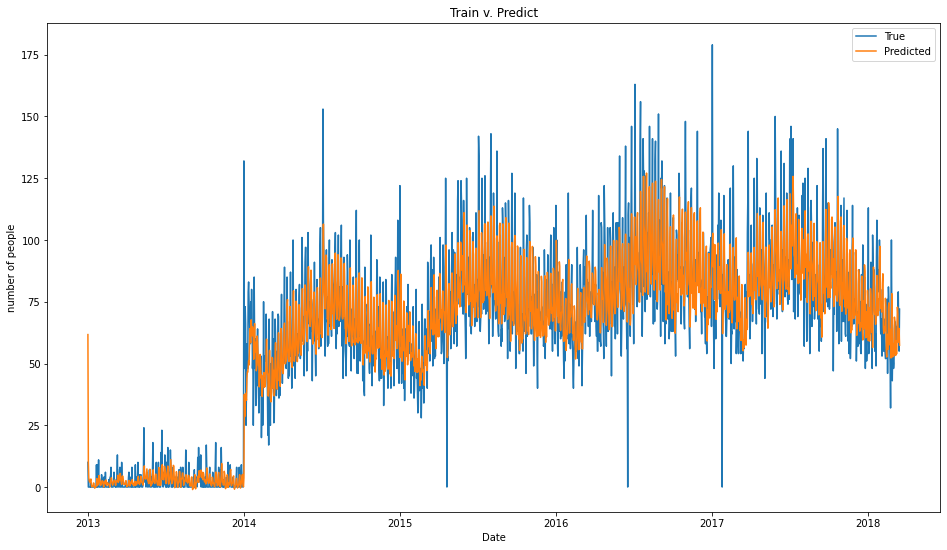

In [63]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(y_train.index, y_train.values, label='True')
plt.plot(y_train.index, y_pred.values, label='Predicted')
plt.title('Train v. Predict')
plt.xlabel('Date')
plt.ylabel('number of people')
plt.legend();

From this plot, we can see that the model struggles with predicting extreme values and just stays in the middle (that might just be good enough)

In [ ]:
y_test_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model_1 = ARIMA(history, order=(7, 0, 6)).fit()
    next_pred = model_1.forecast()
    y_test_wfv = y_test_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

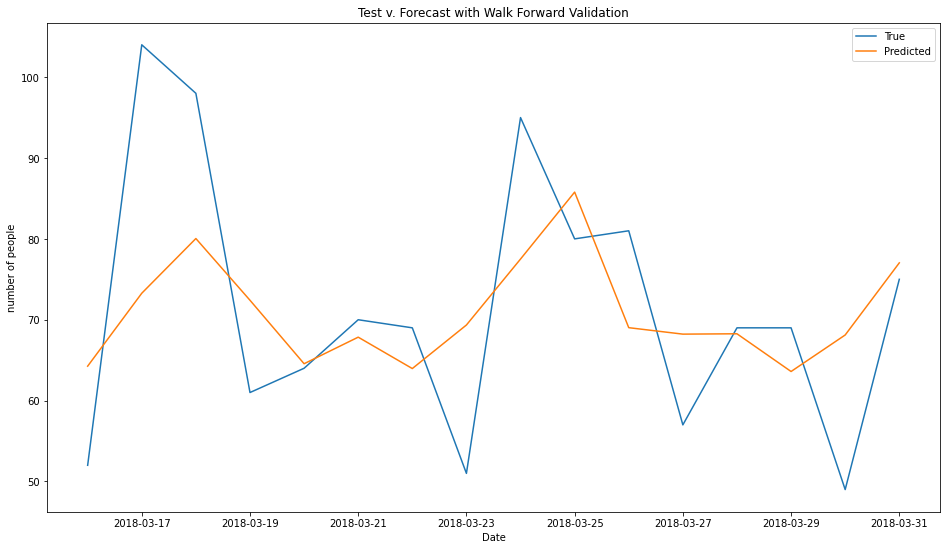

In [64]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(y_test.index, y_test.values, label='True')
plt.plot(y_test.index, y_test_wfv.values, label='Predicted')
plt.title('Test v. Forecast with Walk Forward Validation')
plt.xlabel('Date')
plt.ylabel('number of people')
plt.legend();

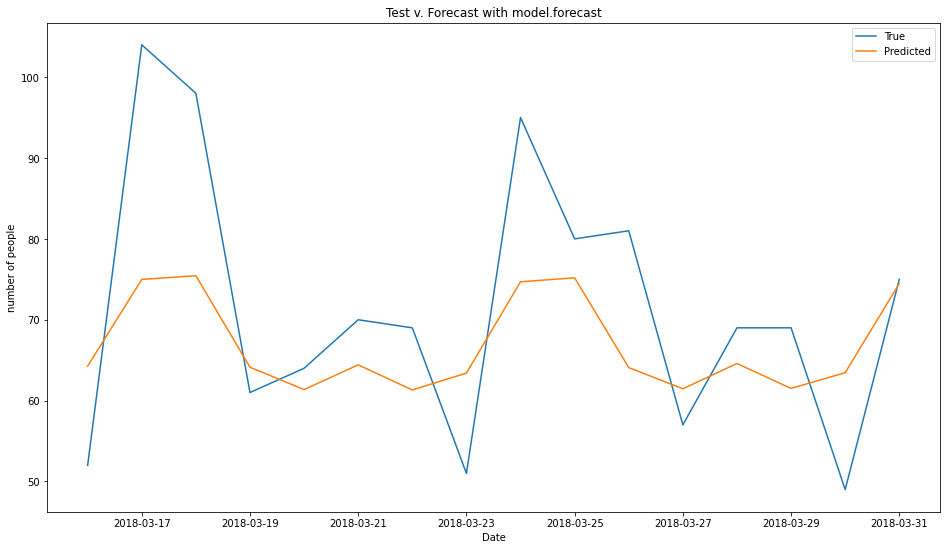

In [65]:
y_test_pred = model.forecast(len(y_test))
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(y_test.index, y_test.values, label='True')
plt.plot(y_test.index, y_test_pred.values, label='Predicted')
plt.title('Test v. Forecast with model.forecast')
plt.xlabel('Date')
plt.ylabel('number of people')
plt.legend();

In [44]:
mean_absolute_error(y_test, len(y_test) * [y_train.mean()])

14.606973684210528

In [46]:
mean_absolute_error(y_test, y_test_pred)

10.53912022902051

In [38]:
mean_absolute_error(y_test, y_test_wfv)

10.763219751958719

Ok, a quick explaination of all these (rubbish)

So, I used two different methods to create forecasts. One less computationally expensive than the other. The first method is the Walk-Forward Validation Method.
Here, after making a prediction, the corresponding value is add to the time series and the model is run again. 

The second method was to call `model.forecast` (pretty straight-forward). 

Both methods returned similar accuracy in terms of the `mean_absolute_error` with the second method performing a little better than the first with an accuracy of around `10.53`. It is important to remember that the training accuracy was around `9.94`...so it's safe to say the model generalises well.



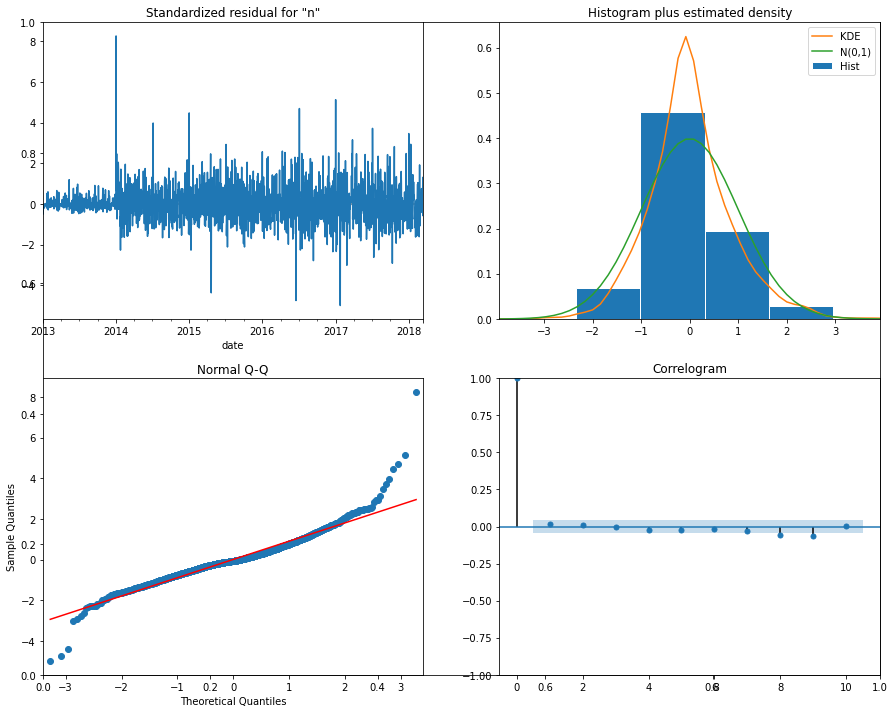

In [37]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

Well, we just seem to be creating complex non-meaningful plots.

These plots are what well us how good the time series is...

The **Standardized residual for 'n'** plot not have any noticeable pattern (i.e. plot should be random noise) which it doesn't.

The **KDE** line in the **Histogram plus estimated density** plot should look like the Normal Distribution, which it does.

Most of the points/dots in the **Normal Q-Q** plot should be on the line (which is kind of true here).

And lastly, about >95% of the lags on the **Correlogram** should not be significant. But I'd say about 90 here. 

🥵😣😖 

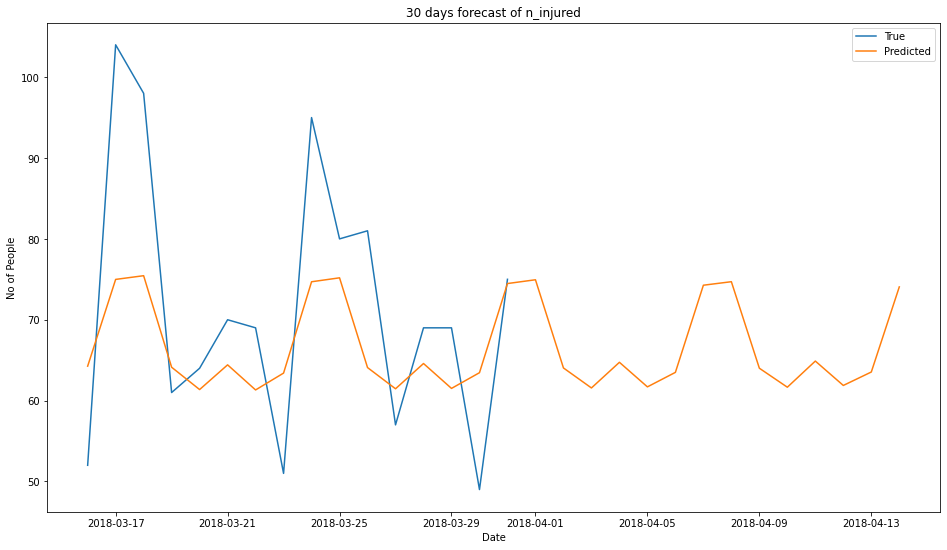

In [60]:
#Forecasts
forecasts = model.forecast(30)
fig, ax = plt.subplots(figsize=(16, 9))
# plt.plot(y_train.index, y_train.values, label='True')
plt.plot(y_test.index, y_test.values, label='True')
# plt.plot(y_test_pred.index, y_test_wfv.values)
plt.plot(forecasts.index, forecasts.values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('No of People')
plt.title('30 days forecast of n_injured')
plt.legend();

Well, that's it...

We have gotten to the final stage and made some predictions. Although they don't look very good but it works though. 😩